<a href="https://www.kaggle.com/code/mohdmuttalib/dlf-123?scriptVersionId=183227434" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dfl-bundesliga-data-shootout/sample_submission.csv
/kaggle/input/dfl-bundesliga-data-shootout/train.csv
/kaggle/input/dfl-bundesliga-data-shootout/clips/54745b_5.mp4
/kaggle/input/dfl-bundesliga-data-shootout/clips/0bfacc_5.mp4
/kaggle/input/dfl-bundesliga-data-shootout/clips/ec783a_6.mp4
/kaggle/input/dfl-bundesliga-data-shootout/clips/cd987c_1.mp4
/kaggle/input/dfl-bundesliga-data-shootout/clips/798b45_1.mp4
/kaggle/input/dfl-bundesliga-data-shootout/clips/55c9d1_0.mp4
/kaggle/input/dfl-bundesliga-data-shootout/clips/08fd33_8.mp4
/kaggle/input/dfl-bundesliga-data-shootout/clips/c01561_5.mp4
/kaggle/input/dfl-bundesliga-data-shootout/clips/744b27_2.mp4
/kaggle/input/dfl-bundesliga-data-shootout/clips/538438_3.mp4
/kaggle/input/dfl-bundesliga-data-shootout/clips/42ba34_4.mp4
/kaggle/input/dfl-bundesliga-data-shootout/clips/40cd38_4.mp4
/kaggle/input/dfl-bundesliga-data-shootout/clips/121364_8.mp4
/kaggle/input/dfl-bundesliga-data-shootout/clips/744b27_0.mp4
/kaggle/input/

In [2]:
import numpy as np
import pandas as pd

# plot
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!ls -l '../input/dfl-bundesliga-data-shootout/'

total 468
drwxr-xr-x 2 nobody nogroup      0 Jun  3 15:38 clips
-rw-r--r-- 1 nobody nogroup   1914 Jun  3 15:38 sample_submission.csv
drwxr-xr-x 2 nobody nogroup      0 Jun  3 15:38 test
drwxr-xr-x 2 nobody nogroup      0 Jun  3 15:38 train
-rw-r--r-- 1 nobody nogroup 471056 Jun  3 15:38 train.csv


In [4]:
df_train = pd.read_csv('../input/dfl-bundesliga-data-shootout/train.csv')
df_train.head()

,video_id,time,event,event_attributes
0,1606b0e6_0,200.265822,start,NaN
1,1606b0e6_0,201.150000,challenge,['ball_action_forced']
2,1606b0e6_0,202.765822,end,NaN
3,1606b0e6_0,210.124111,start,NaN
4,1606b0e6_0,210.870000,challenge,['opponent_dispossessed']


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11218 entries, 0 to 11217
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video_id          11218 non-null  object 
 1   time              11218 non-null  float64
 2   event             11218 non-null  object 
 3   event_attributes  4382 non-null   object 
dtypes: float64(1), object(3)
memory usage: 350.7+ KB


In [6]:
n = df_train.shape[0]
print('Number of data points:', n)

Number of data points: 11218


In [7]:
df_train.loc[df_train.event_attributes.isna(),'event_attributes'] = '[]'

In [8]:
df_train.time.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

count    11218.000000
mean      1787.796418
std        860.845970
min        175.025822
10%        628.426418
25%       1050.635250
50%       1769.089449
75%       2527.932750
90%       2930.640447
max       3575.000727
Name: time, dtype: float64

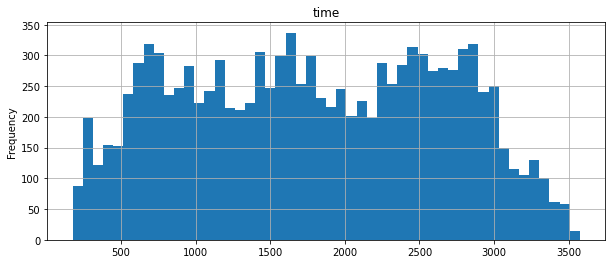

In [9]:
plt.figure(figsize=(10,4))
df_train.time.plot(kind='hist', bins=50)
plt.title('time')
plt.grid()
plt.show()

In [10]:
df_train.video_id.value_counts()

1606b0e6_1    1249
35bd9041_0    1075
3c993bd2_0    1042
1606b0e6_0    1000
ecf251d4_0     980
3c993bd2_1     966
35bd9041_1     933
407c5a9e_1     858
cfbe2e94_0     823
4ffd5986_0     792
cfbe2e94_1     763
9a97dae4_1     737
Name: video_id, dtype: int64

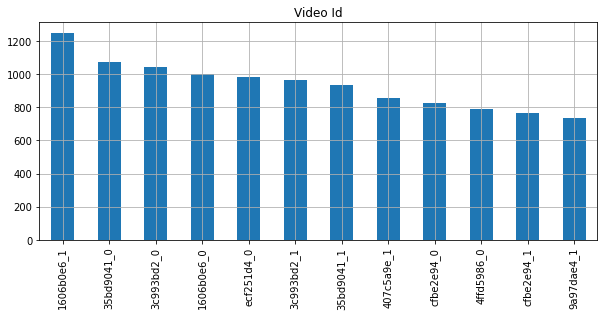

In [11]:
plt.figure(figsize=(10,4))
df_train.video_id.value_counts().plot(kind='bar')
plt.title('Video Id')
plt.grid()
plt.show()

In [12]:
df_train.event.value_counts()

play         3586
start        3418
end          3418
challenge     624
throwin       172
Name: event, dtype: int64

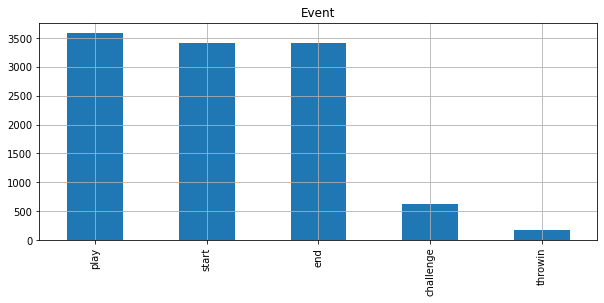

In [13]:
plt.figure(figsize=(10,4))
df_train.event.value_counts().plot(kind='bar')
plt.title('Event')
plt.grid()
plt.show()

In [14]:
df_train.event_attributes.value_counts()

[]                                    6836
['pass', 'openplay']                  3337
['ball_action_forced']                 239
['pass']                               154
['opponent_dispossessed']              138
['pass', 'freekick']                   127
['fouled']                             111
['cross', 'openplay']                   80
['challenge_during_ball_transfer']      53
['possession_retained']                 44
['opponent_rounded']                    39
['cross', 'corner']                     33
['cross']                               18
['cross', 'freekick']                    5
['pass', 'corner']                       4
Name: event_attributes, dtype: int64

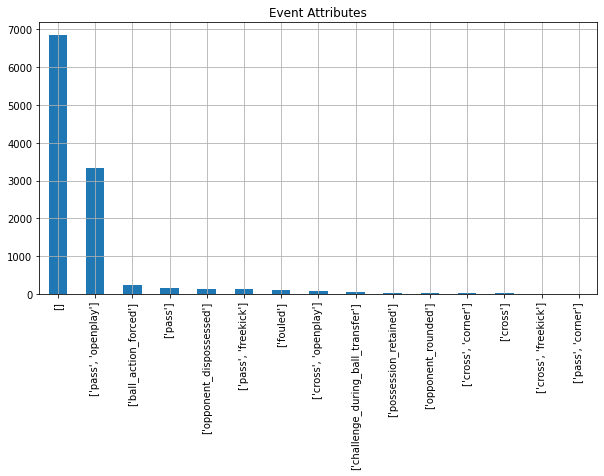

In [15]:
plt.figure(figsize=(10,5))
df_train.event_attributes.value_counts().plot(kind='bar')
plt.title('Event Attributes')
plt.grid()
plt.show()

In [16]:
df_train['event_full'] = df_train.event + '-' + df_train.event_attributes

In [17]:
df_train.event_full.value_counts().sort_index()

challenge-['ball_action_forced']                 239
challenge-['challenge_during_ball_transfer']      53
challenge-['fouled']                             111
challenge-['opponent_dispossessed']              138
challenge-['opponent_rounded']                    39
challenge-['possession_retained']                 44
end-[]                                          3418
play-['cross', 'corner']                          33
play-['cross', 'freekick']                         5
play-['cross', 'openplay']                        80
play-['pass', 'corner']                            4
play-['pass', 'freekick']                        127
play-['pass', 'openplay']                       3337
start-[]                                        3418
throwin-['cross']                                 18
throwin-['pass']                                 154
Name: event_full, dtype: int64

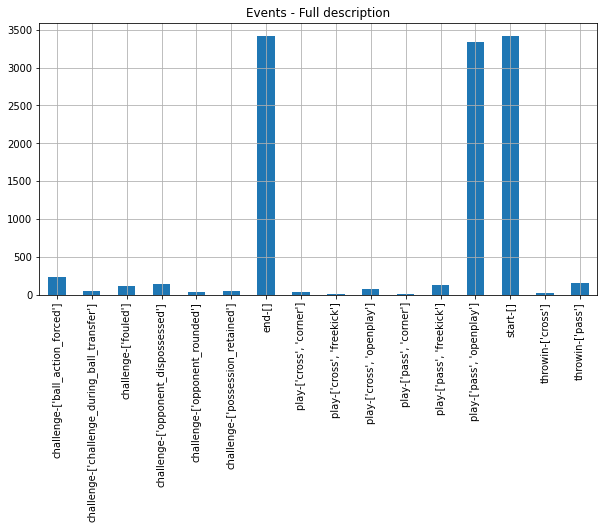

In [18]:
plt.figure(figsize=(10,5))
df_train.event_full.value_counts().sort_index().plot(kind='bar')
plt.title('Events - Full description')
plt.grid()
plt.show()

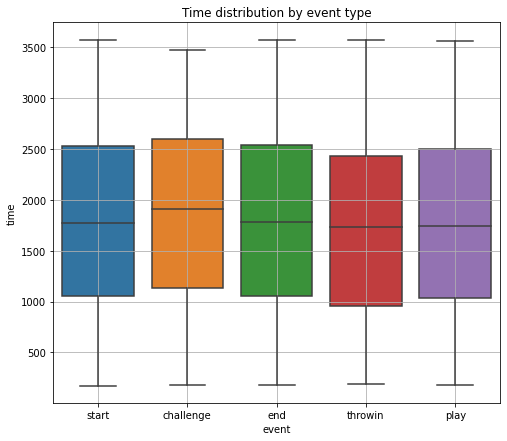

In [19]:
plt.figure(figsize=(8,7))
sns.boxplot(data=df_train, x='event', y='time')
plt.title('Time distribution by event type')
plt.grid()
plt.show()

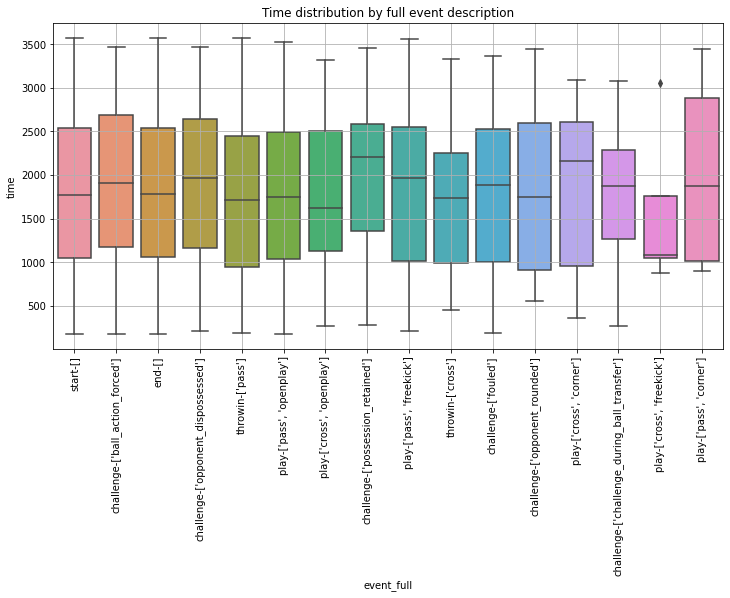

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_train, x='event_full', y='time')
plt.title('Time distribution by full event description')
plt.grid()
plt.xticks(rotation=90)
plt.show()

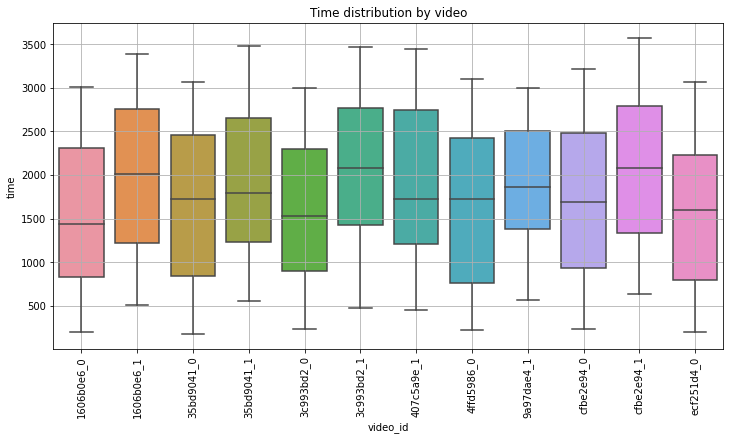

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_train, x='video_id', y='time')
plt.title('Time distribution by video')
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [22]:
vids = df_train.video_id.value_counts().index.to_list()
print(vids)


['1606b0e6_1', '35bd9041_0', '3c993bd2_0', '1606b0e6_0', 'ecf251d4_0', '3c993bd2_1', '35bd9041_1', '407c5a9e_1', 'cfbe2e94_0', '4ffd5986_0', 'cfbe2e94_1', '9a97dae4_1']


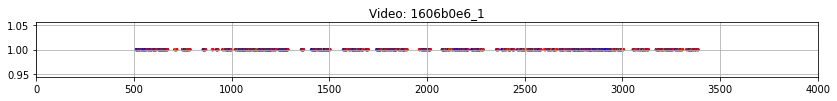

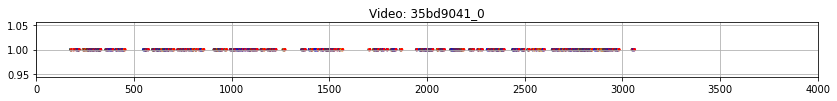

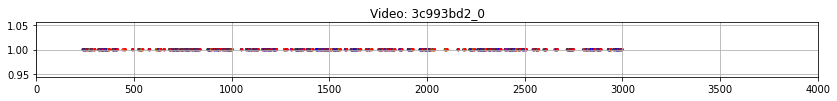

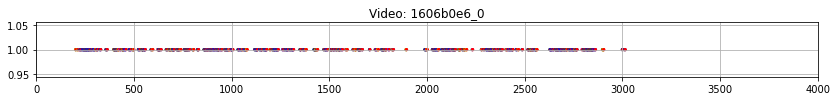

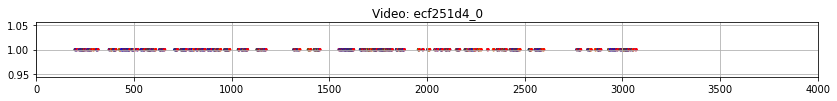

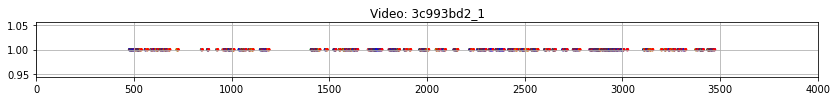

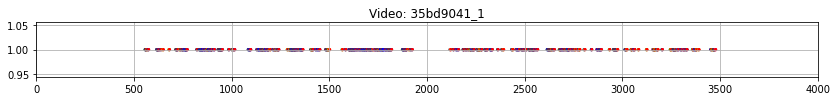

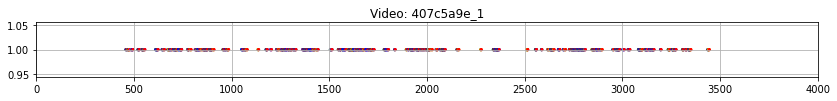

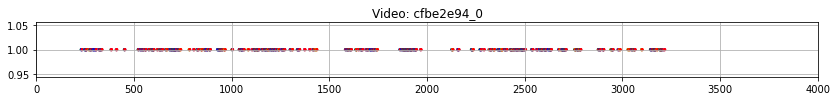

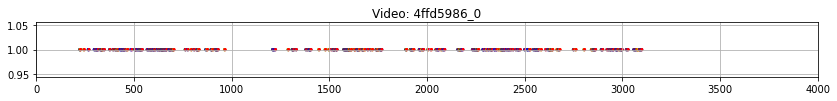

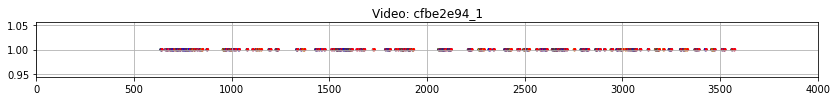

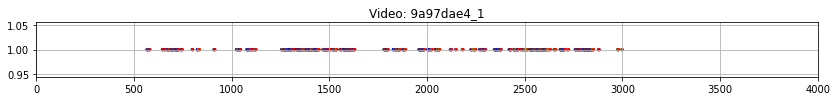

In [23]:
my_colors = {'start':'green',
             'end':'red',
             'play':'blue',
             'challenge':'orange',
             'throwin':'magenta'}
for v in vids:
    df_temp = df_train[df_train.video_id==v]
    plt.figure(figsize=(14,1))
    plt.scatter(x=df_temp.time,
                y=np.ones(shape=df_temp.shape[0]),
                c=df_temp.event.map(my_colors),
                s=5)
    plt.xlim(0,4000)
    plt.title('Video: ' + v)
    plt.grid()
    plt.show()

In [24]:
ctab = pd.crosstab(df_train.video_id, df_train.event)
ctab

event,challenge,end,play,start,throwin
video_id,,,,,
1606b0e6_0,56,302,319,302,21
1606b0e6_1,60,371,434,371,13
35bd9041_0,48,332,355,332,8
35bd9041_1,57,287,290,287,12
3c993bd2_0,53,314,347,314,14
3c993bd2_1,70,295,289,295,17
407c5a9e_1,56,254,283,254,11
4ffd5986_0,57,245,235,245,10
9a97dae4_1,48,223,237,223,6


In [25]:

ctab_norm = (ctab.transpose() / ctab.sum(axis=1).values).transpose()
ctab_norm

event,challenge,end,play,start,throwin
video_id,,,,,
1606b0e6_0,0.056000,0.302000,0.319000,0.302000,0.021000
1606b0e6_1,0.048038,0.297038,0.347478,0.297038,0.010408
35bd9041_0,0.044651,0.308837,0.330233,0.308837,0.007442
35bd9041_1,0.061093,0.307610,0.310825,0.307610,0.012862
3c993bd2_0,0.050864,0.301344,0.333013,0.301344,0.013436
3c993bd2_1,0.072464,0.305383,0.299172,0.305383,0.017598
407c5a9e_1,0.065268,0.296037,0.329837,0.296037,0.012821
4ffd5986_0,0.071970,0.309343,0.296717,0.309343,0.012626
9a97dae4_1,0.065129,0.302578,0.321574,0.302578,0.008141


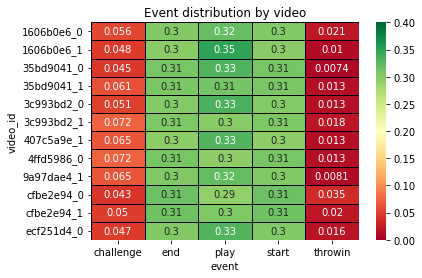

In [26]:
# visualize as heatmap
sns.heatmap(ctab_norm, annot=True,
            cmap='RdYlGn', vmin=0, vmax=0.4,
            linewidths=1,
            linecolor='black')
plt.title('Event distribution by video')
plt.show()